In [31]:
# Install library

In [4]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 2.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install geojson

Note: you may need to restart the kernel to use updated packages.


In [15]:
# Set up packages

%matplotlib inline

import os
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
import requests
import geojson
from pyproj import CRS

In [12]:
# การสร้าง geometry object ด้วย GeoSeries
#ตัวอย่าง ใช้ GeoSeries ในการสร้าง point geometry จาก WKT ที่ระบุข้อมูลตำแหน่งของ 2 จุด
# ดำเนินการกำหนดระบบพิกัดอ้างอิงเริ่มต้น แบบ EPSG 4326

In [19]:
# GeoSeries
gs = GeoSeries([Point(100,12), Point(100.25,11.5), Point(99.8,11)])
gs.crs = CRS.from_string('epsg:4326')
gs

0    POINT (100.00000 12.00000)
1    POINT (100.25000 11.50000)
2     POINT (99.80000 11.00000)
dtype: geometry

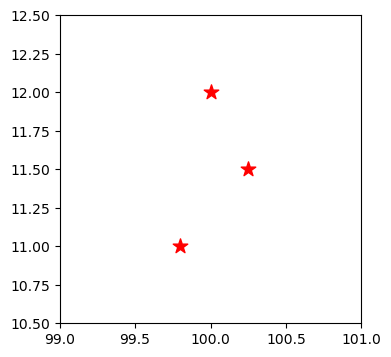

In [27]:
# create map
gs.plot(marker='*', color='red', markersize=120, figsize=(4, 4))
plt.xlim([99, 101])
plt.ylim([10.5, 12.5])
plt.show()

In [29]:
# GeoDataframe เริ่มจากเตรียมข้อมูลจุดพิกัด และ attribute บน pandas dataframe

data = {'name':['pa', 'pb', 'pc', 'pd', 'pe'],
       'lat':[11.45, 11.26, 10.85, 11, 10.5],
       'lon':[99.58, 100.12, 100, 100.41, 101.1],
       'code':['A101', 'A101', 'A102', 'A103', 'A101']}
df = pd.DataFrame(data)
df

,name,lat,lon,code
0,pa,11.45,99.58,A101
1,pb,11.26,100.12,A101
2,pc,10.85,100.00,A102
3,pd,11.00,100.41,A103
4,pe,10.50,101.10,A101


<Axes: >

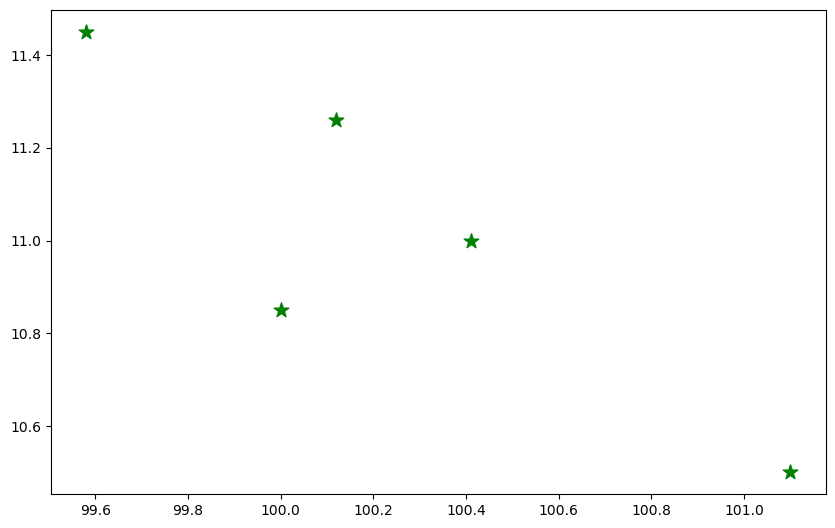

In [30]:
# create geometry from dataframe

geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)

#plot results
gdf.plot(marker='*', color='green', markersize=120, figsize=(10,10))